In [1]:
# add modules folder to Python's search path
import os, sys
from pathlib import Path

script_dir = Path(os.path.abspath(''))
module_dir = str(script_dir.parent)
print(script_dir)
print(module_dir)
sys.path.insert(0, module_dir + '/modules')

# import necessary modules
import wasserstein as ws
import tensorflow_probability as tfp
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

C:\Users\pinak\Documents\GitHub\sinkhorn-descent\notebooks
C:\Users\pinak\Documents\GitHub\sinkhorn-descent


**Define weight, pdf and sampler**

In [2]:
n_particles, y = 100, 8.
def w(x, mu):
  return tf.squeeze(tf.math.exp(-0.5*(x-mu)**2))

X = tfp.distributions.Normal(loc=0., scale=1.)
Z = tfp.distributions.Normal(loc=y/2., scale=0.5)
def p(x):
  return X.prob(x)
def sampler(shape):
  return X.sample(shape)

**Use Sinkhorn Gradient descent to find a uniform sample**

In [5]:
sample = sampler((n_particles, 1))
weights = w(sample, y)
usf = ws.UniformSampleFinder(sample, weights, epsilon=0.01, cost_p=10)
u_sample = usf.find(n_iters=100);

Step = 1, Sinkhorn divergence = 16.179340362548828
Step = 2, Sinkhorn divergence = 14.736889839172363
Step = 3, Sinkhorn divergence = 13.347339630126953
Step = 4, Sinkhorn divergence = 12.138679504394531
Step = 5, Sinkhorn divergence = 11.019439697265625
Step = 6, Sinkhorn divergence = 9.901769638061523
Step = 7, Sinkhorn divergence = 8.841699600219727
Step = 8, Sinkhorn divergence = 8.066309928894043
Step = 9, Sinkhorn divergence = 7.3012800216674805
Step = 10, Sinkhorn divergence = 6.526219844818115
Step = 11, Sinkhorn divergence = 5.83922004699707
Step = 12, Sinkhorn divergence = 5.229489803314209
Step = 13, Sinkhorn divergence = 4.546710014343262
Step = 14, Sinkhorn divergence = 3.9638400077819824
Step = 15, Sinkhorn divergence = 3.4508798122406006
Step = 16, Sinkhorn divergence = 3.010200023651123
Step = 17, Sinkhorn divergence = 2.54899001121521
Step = 18, Sinkhorn divergence = 2.192319869995117
Step = 19, Sinkhorn divergence = 1.937559962272644
Step = 20, Sinkhorn divergence = 1

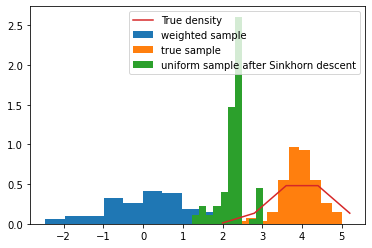

In [8]:
sample_ = tf.squeeze(sample).numpy()
x = np.arange(y/2.-2., y/2.+2., 0.8)
px = np.exp(-(x-y/2.)**2)/np.sqrt(np.pi)
z = Z.sample(n_particles).numpy()
plt.hist(sample_, density=True, label='weighted sample')
plt.hist(z, density=True, label='true sample')
plt.hist(u_sample.numpy(), density=True, label='uniform sample after Sinkhorn descent')
plt.plot(x, px, label='True density')
plt.legend()
plt.show()

In [12]:
np.sum(sample_ * weights) / weights.numpy().sum()

2.3669312

In [4]:
u_sample

TypeError: 'Variable' object is not iterable.

In [ ]:
sample_ = tf.squeeze(sample).numpy()
x = np.arange(y/2.-2., y/2.+2., 0.8)
px = np.exp(-(x-y/2.)**2)/np.sqrt(np.pi)
z = Z.sample(n_particles).numpy()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.hist(sample_, density=True, label='weighted sample')
ax.hist(z, density=True, label='true sample')
ax.hist(u_sample.numpy(), density=True, label='uniform sample after Sinkhorn descent')
ax.plot(x, px, label='True density', c='red')
plt.legend()
plt.show()

In [16]:
weights/tf.reduce_sum(weights)

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([1.03169426e-04, 6.70599111e-05, 2.07980452e-10, 2.91829556e-03,
       1.41228504e-08, 1.74459990e-06, 1.57817285e-05, 6.25420541e-15,
       3.84807519e-10, 4.56161928e-07, 1.86995242e-09, 2.20749841e-09,
       4.09357206e-08, 1.17306465e-09, 2.91541569e-09, 3.69585723e-01,
       1.09450654e-15, 1.70964686e-05, 1.76849146e-09, 4.08557923e-07,
       6.03504020e-08, 2.86066424e-08, 1.58225335e-02, 7.61299889e-05,
       6.25572427e-10, 8.54055361e-06, 8.66561294e-08, 1.35859098e-15,
       3.56783090e-07, 4.28883240e-08, 1.49459084e-10, 4.96075451e-02,
       4.02241263e-08, 2.55730352e-04, 5.12558052e-10, 1.30802015e-04,
       4.21391093e-07, 5.73744142e-11, 4.00143776e-08, 1.28709435e-13,
       1.17221589e-07, 2.58275623e-10, 1.92059910e-12, 2.82805442e-04,
       5.54672697e-10, 2.80508377e-11, 3.05188999e-11, 4.44275520e-06,
       3.10013798e-12, 5.50083069e-11, 4.84998736e-07, 9.60815578e-06,
       1.14055888e-06, 5.0079

In [ ]:
u_sample